In [2]:
# importing stuff
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
# accessing dataset
file = "ESACCI-WATERVAPOUR-L3S-LP-MERGED-MZM-5deg-1985-2019_v3.3.nc"
ds = nc.Dataset(file)
zmh2o = ds["zmh2o"]

zmh2o is a 3D list with the shape (420, 28, 36), and respective properties (time, plev, lat).
The unit is moles/mole.

I want to find average for all lats and plevs for each unit of time. Discarding all Nan-values.

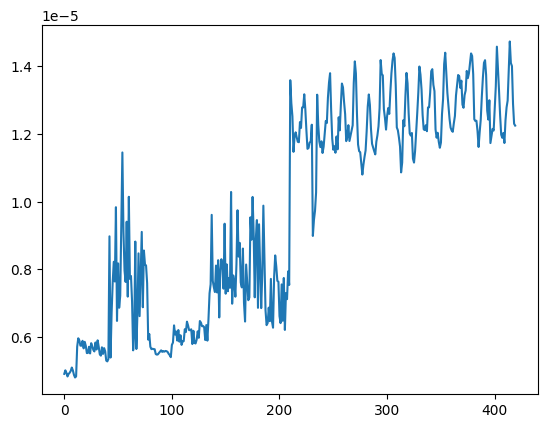

In [4]:
avg_ratio_slices = [np.nanmean(zmh2o[i,:,:]) for i in range(zmh2o.shape[0])]

time = np.arange(zmh2o.shape[0])
plt.plot(time, avg_ratio_slices)

Too noisy plot to make something informative. Averaging for each year as this gives a more distinctive trend.

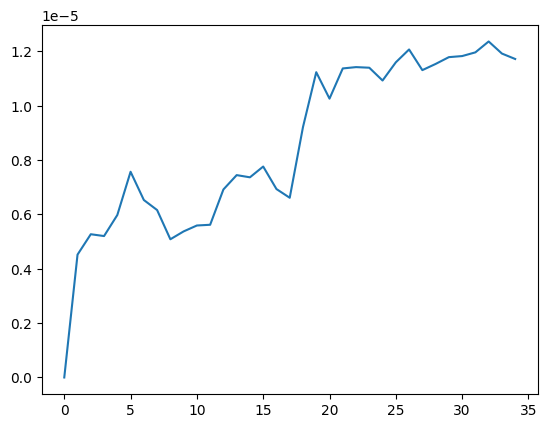

In [5]:
yearly_avg = []
new_avg = 0
split = 12

for i in range(len(avg_ratio_slices)):
    if i % split != 0:
        new_avg += avg_ratio_slices[i]
    else:
        yearly_avg.append(new_avg/split)
        new_avg = 0

year = np.arange(len(yearly_avg))
plt.plot(year, yearly_avg)

Now it is easier to see a certain trend of water vapor ratio in air (moles/mole).

Creating a scatter plot with center of, area, and color of circle corresponding to ratio of water vapour in air.

In [10]:
# data was collected over these years
years = np.arange(1985, 2019)

# radii of circles based on ratios relative to minimal ratio value
# * 85 to scale the circles nicely 
circle_radii = (yearly_avg - np.min(yearly_avg)) / (np.max(yearly_avg) - np.min(yearly_avg)) * 85

fig = go.Figure()

# color choice hopefully makes the plot readable for colorblind people
fig.add_trace(go.Scatter(
    x = years,
    y = yearly_avg,
    mode = 'markers',
    marker = dict(
        size = circle_radii,
        opacity = 0.85,
        colorscale = "peach",
        color = yearly_avg,
        line = dict(width = 0)
    ),
))

fig.update_xaxes(showgrid = False, showticklabels = False, zeroline = False)
fig.update_yaxes(showgrid = False, showticklabels = False, zeroline = False)
fig.update_layout(
    height = 600, 
    width = 600*1.618, 
    plot_bgcolor = 'paleturquoise',
    paper_bgcolor = 'paleturquoise'
)

pio.write_image(fig, "submitted_picture.pdf")
fig.show(config={'displayModeBar': False})